Nesse curso, usaremos a base de dados do MNIST para aprender sobre CNN

In [1]:
# Importações
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Baixamos o dataset
dataset = MNIST(root='data/', download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

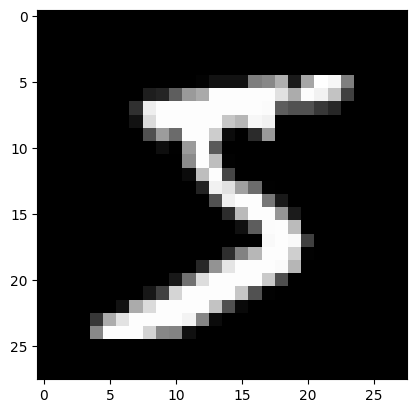

In [7]:
# Mostramos a imagem
image, label = dataset[0]
plt.imshow(image, cmap='gray')

In [8]:
import torchvision.transforms as transforms

PyTorch não é uma biblioteca para processamento de imagens, e sim de tensores. Portanto, precisamos converter a imagem em tensores.

In [9]:
dataset = MNIST(root="data/", train=True, transform=transforms.ToTensor())

In [10]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)
# torch.Size([1, 28, 28]) 5 --> 1 canal de cor, 28x28 pixels que representa o 5

torch.Size([1, 28, 28]) 5


In [11]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


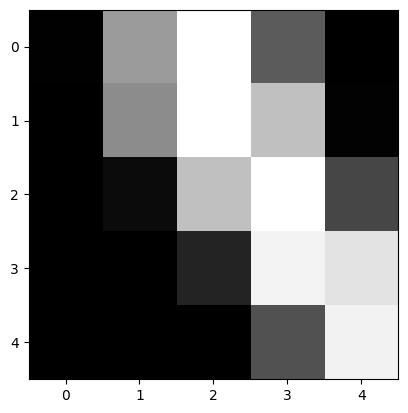

In [12]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

## Treinamento e Validação

Para construir modelos para aplicações reais de aprendizado de máquina, precisamos separar o dataset em 3 partes:

1. Treinamento: Usado para o treinamento do modelo;
2. Validação: Usado para validar o modelo durante o treinamento;
3. Teste: Usado para comparar diferentes resultados de modelos diferentes e medir a acurácia.

In [13]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [14]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)